In [26]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

MASK_CSV_PATH = '/inputdata/train_ship_segmentations_v2.csv'

In [16]:
print(os.getcwd()+MASK_CSV_PATH)


/Users/kate/Documents/KAGGLE_SHIPDETECTION/inputdata/train_ship_segmentations_v2.csv


In [20]:

masks_df = pd.read_csv(os.getcwd()+MASK_CSV_PATH)     
masks_df

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...,...,...
231718,fffedbb6b.jpg,NaN
231719,ffff2aa57.jpg,NaN
231720,ffff6e525.jpg,NaN
231721,ffffc50b4.jpg,NaN


In [18]:
masks_df.shape

(231723, 2)

In [27]:
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formatted (start length)
    shape: (height, width) of array to return
    Returns numpy array, 1 - mask, 0 - background
    '''
    if pd.isna(mask_rle):
        return mask_rle
    s = list(map(int, mask_rle.split()))
    starts, lengths = s[0::2], s[1::2]
    starts = np.array(starts) - 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  

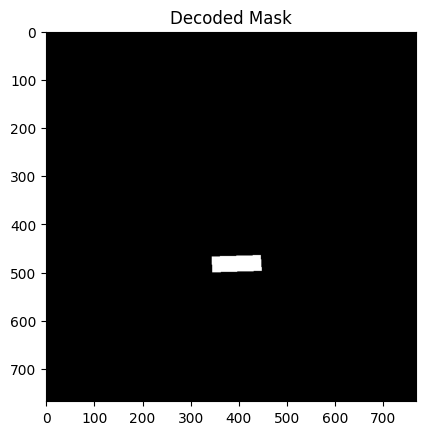

In [28]:
example_rle = masks_df['EncodedPixels'].iloc[2]
mask = rle_decode(example_rle)
plt.imshow(mask, cmap='gray')
plt.title("Decoded Mask")
plt.show()


In [31]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)